In [1]:
emails = read.csv("./data/emails.csv", stringsAsFactors=FALSE)

In [2]:
str(emails)

'data.frame':	5728 obs. of  2 variables:
 $ text: chr  "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqg"| __truncated__ "Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ra"| __truncated__ "Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 1"| __truncated__ "Subject: 4 color printing special  request additional information now ! click here  click here for a printable version of our o"| __truncated__ ...
 $ spam: int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
table(emails$spam)


   0    1 
4360 1368 

In [4]:
max(nchar(emails$text))

[1] 43952

In [5]:
which.min(nchar(emails$text))

[1] 1992

In [6]:
library(tm)

Loading required package: NLP


In [7]:
corpus = Corpus(VectorSource(emails$text))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, stemDocument)
corpus = tm_map(corpus, PlainTextDocument)
dtm = DocumentTermMatrix(corpus)

In [8]:
str(dtm)

List of 6
 $ i       : int [1:481719] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:481719] 333 3880 3983 4314 5020 5453 5551 6151 6347 6445 ...
 $ v       : num [1:481719] 1 1 1 1 1 2 1 1 1 2 ...
 $ nrow    : int 5728
 $ ncol    : int 28687
 $ dimnames:List of 2
  ..$ Docs : chr [1:5728] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:28687] "000" "0000" "000000" "00000000" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [9]:
spdtm = removeSparseTerms(dtm, 0.95)

In [10]:
str(spdtm)

List of 6
 $ i       : int [1:213551] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:213551] 36 41 48 57 67 81 85 86 94 111 ...
 $ v       : num [1:213551] 2 2 3 1 1 1 2 1 1 1 ...
 $ nrow    : int 5728
 $ ncol    : int 330
 $ dimnames:List of 2
  ..$ Docs : chr [1:5728] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:330] "000" "2000" "2001" "713" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [11]:
emailsSparse = as.data.frame(as.matrix(spdtm))

In [12]:
colnames(emailsSparse) = make.names(colnames(emailsSparse))

In [13]:
which.max(colSums(emailsSparse))

enron 
   92

In [14]:
emailsSparse$spam = emails$spam

In [15]:
sort(colSums(subset(emailsSparse, spam == 0)))

spam       life      remov      money      onlin    without     websit 
         0         80        103        114        173        191        194 
     click    special       wish      repli        buy        net       link 
       217        226        229        239        243        243        247 
    immedi       done       mean     design        lot     effect       info 
       249        254        259        261        268        270        273 
    either       read      write       line      begin      sorri    success 
       279        279        286        289        291        293        293 
    involv      creat    softwar     better     vkamin        say       keep 
       294        299        299        301        301        305        306 
     bring     believ       full    increas     realli    mention    thought 
       311        313        317        320        324        325        325 
      idea     invest      secur     specif      sever     experi      thing 
       327        327        337        338        340        346        347 
     allow      check        due       type      happi     return     expect 
       348        351        351        352        354        355        356 
     short     effort       open   internet     sincer     public     recent 
       357        358        360        361        361        364        368 
     anoth    alreadi       home       made    respond      given        etc 
       369        372        375        380        382        383        385 
       put     within      place      right    version      hello       sure 
       385        386        388        390        390        395        396 
      area        run     arrang    account       join       hour      locat 
       397        398        399        401        403        404        406 
    togeth      engin     import        per     corpor       high     result 
       406        411        411        412        414        416        418 
      hear      final       deal     applic       even        web     custom 
       420        422        423        428        429        430        433 
      soon       long       sinc      futur     member       X000      event 
       435        436        439        440        446        447        447 
       don       part       feel    tuesday  wednesday      still       unit 
       450        450        453        454        456        457        457 
      site       X853    continu understand    resourc     robert    analysi 
       458        461        464        464        466        466        468 
      form      point     assist    confirm     differ     intern      might 
       468        474        475        485        489        489        490 
      real       case      howev    comment        abl    complet       rate 
       490        492        496        505        515        515        516 
   appreci        tri       move      updat     approv    suggest       free 
       518        521        526        527        533        533        535 
  contract     detail       morn        end       mani     attend   thursday 
       544        546        546        550        550        558        558 
    direct     requir      cours     person      relat     depart      today 
       561        562        567        569        573        575        577 
     start        way       mark       valu    problem      peopl       note 
       580        586        588        590        593        599        600 
    school      invit     access       term       juli     monday     gibner 
       607        614        617        625        630        630        633 
      base   director      offer       cost      addit      kevin      great 
       635        640        643        646        648        654        655 
       set       file       find       much       oper      order      deriv 
       658        659       

In [16]:
sort(colSums(subset(emailsSparse, spam == 1)))

X713   crenshaw      enron     gibner   kaminski    stinson     vkamin 
         0          0          0          0          0          0          0 
      X853       vinc        doc      kevin    shirley      deriv      april 
         1          1          2          2          2          3          5 
   houston      resum        edu     friday        hou  wednesday        ect 
         5          5          7          7          8          8         10 
    arrang  interview     attend     london     robert    student    schedul 
        11         13         15         15         16         16         17 
  thursday     monday       john    tuesday     attach    suggest    appreci 
        17         19         20         20         21         21         23 
      mark      begin    comment    analysi      X2001      model       hope 
        25         26         26         27         29         29         30 
   mention      X2000     togeth     confer      invit    univers     financ 
        30         32         32         33         33         34         35 
      talk     either        run       morn      shall      happi    thought 
        38         39         39         40         40         42         42 
    depart    confirm    respond     school       corp        etc       hear 
        46         47         48         48         49         49         49 
     howev      sorri       idea     energi    discuss       open     option 
        49         50         51         55         56         56         56 
      soon understand      cours     experi     associ      point      bring 
        57         57         59         59         62         62         63 
  director   particip      anoth       join      still      final   research 
        65         65         66         66         66         68         68 
      case        set     specif      given       juli    problem        put 
        69         69         69         70         71         73         73 
   alreadi        ask        abl       deal        fax       book       team 
        74         74         75         75         75         76         76 
      issu      locat       meet      updat        lot     sincer     better 
        79         79         79         79         80         80         82 
     short       sinc       done   question     recent    possibl   contract 
        82         82         83         83         83         84         85 
       end       move       data      might    continu       note       feel 
        85         86         87         87         88         88         90 
   resourc      sever       area   communic     realli        due     direct 
        90         90         92         92         93         94         96 
    origin       copi       unit       long     member       sure      allow 
        96         97         97         98         99         99        102 
      dear     public      write      event        let     differ       file 
       104        104        104        105        107        109        111 
    involv    respons      creat       type     approv     detail     effort 
       111        113        114        114        115        115        115 
    intern    request        say     import    support       part      relat 
       117        117        118        119        120        121        121 
    assist       last        two       back       keep      addit       date 
       123        124        124        125        125        126        127 
     place      group       mean       valu      think      offic       read 
       128        130        131        131        132        133        134 
    immedi      check     applic      hello        tri     review     believ 
       136        137        139        139        140        142        143 
     phone       hour      power    present    process     corpor       oper 
       143        144       

In [17]:
emailsSparse$spam = as.factor(emailsSparse$spam)
set.seed(123)
library(caTools)
split = sample.split(emailsSparse$spam, SplitRatio=0.7)
train = subset(emailsSparse, split==TRUE)
test = subset(emailsSparse, split==FALSE)

In [18]:
spamLog = glm(spam ~ ., data=train, family=binomial)
train.predictLog = predict(spamLog, newdata=train)

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [19]:
table(train.predictLog < 0.00001)


FALSE  TRUE 
  954  3056 

In [20]:
table(train.predictLog > 0.99999)


FALSE  TRUE 
 3056   954 

In [21]:
table(train.predictLog < 0.99999 & train.predictLog > 0.00001)


FALSE 
 4010 

In [22]:
summary(spamLog)


Call:
glm(formula = spam ~ ., family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.011   0.000   0.000   0.000   1.354  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -3.082e+01  1.055e+04  -0.003    0.998
X000         1.474e+01  1.058e+04   0.001    0.999
X2000       -3.631e+01  1.556e+04  -0.002    0.998
X2001       -3.215e+01  1.318e+04  -0.002    0.998
X713        -2.427e+01  2.914e+04  -0.001    0.999
X853        -1.212e+00  5.942e+04   0.000    1.000
abl         -2.049e+00  2.088e+04   0.000    1.000
access      -1.480e+01  1.335e+04  -0.001    0.999
account      2.488e+01  8.165e+03   0.003    0.998
addit        1.463e+00  2.703e+04   0.000    1.000
address     -4.613e+00  1.113e+04   0.000    1.000
allow        1.899e+01  6.436e+03   0.003    0.998
alreadi     -2.407e+01  3.319e+04  -0.001    0.999
also         2.990e+01  1.378e+04   0.002    0.998
analysi     -2.405e+01  3.860e+04  -0.001    1.000
a

In [30]:
table(train$spam, train.predictLog > 0.5)

   
    FALSE TRUE
  0  3052    0
  1     4  954

In [31]:
(3052+954)/(3052+954+4)

[1] 0.9990025

In [62]:
test.predictLog = predict(spamLog, newdata=test)
table(test$spam, test.predictLog > 0.5)

   
    FALSE TRUE
  0  1258   50
  1    34  376

In [63]:
(1258+376)/nrow(test)

[1] 0.9511059

In [64]:
predROCR4 = prediction(test.predictLog, test$spam)
performance(predROCR4, "auc")@y.values

[[1]]
[1] 0.9767994

In [32]:
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [33]:
predROCR = prediction(train.predictLog, train$spam)
performance(predROCR, "auc")@y.values

[[1]]
[1] 0.9999959

In [23]:
library(rpart)
library(rpart.plot)

In [49]:
spamCART = rpart(spam ~ ., data=train, method="class")
train.predictCART = predict(spamCART, newdata=train, type="class")

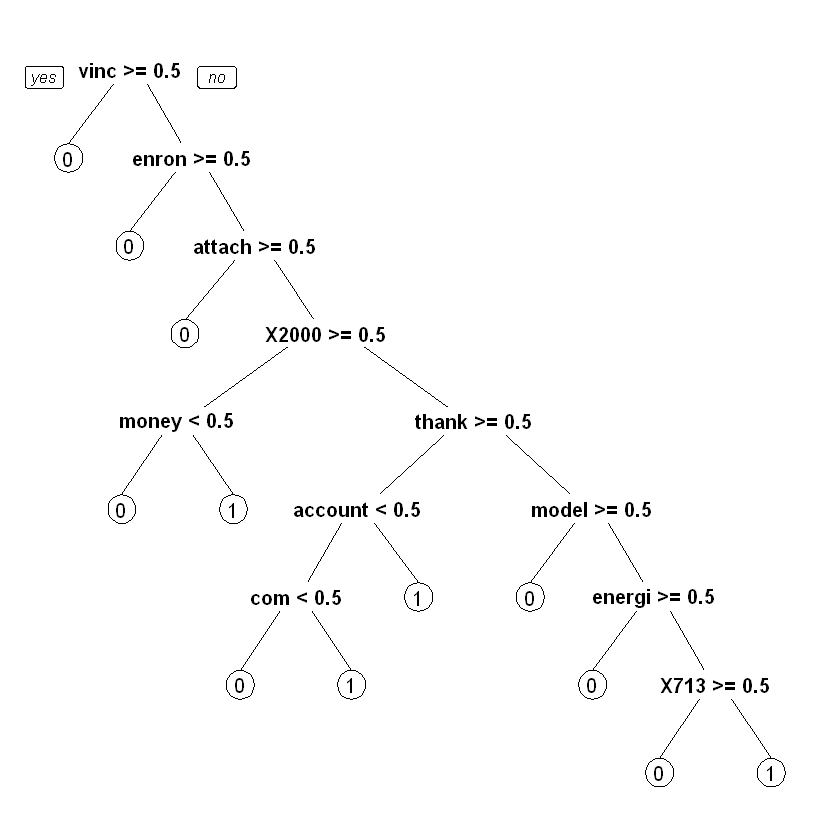

In [40]:
prp(spamCART)

In [42]:
table(train$spam, train.predictCART)

   train.predictCART
       0    1
  0 2885  167
  1   64  894

In [43]:
(2885+894)/(2885+167+64+894)

[1] 0.942394

???

In [52]:
predROCR2 = prediction(train.predictCART, train$spam)
as.numeric(performance(predROCR2, "auc")@y.values)

ERROR: Error in prediction(train.predictCART, train$spam): Format of predictions is invalid.


ERROR: Error in performance(predROCR2, "auc"): 找不到对象'predROCR2'


In [65]:
test.predictCART = predict(spamCART, newdata=test, type="class")
table(test$spam, test.predictCART)

   test.predictCART
       0    1
  0 1228   80
  1   24  386

In [66]:
(1228+386)/nrow(test)

[1] 0.9394645

In [72]:
predROCR5 = prediction(test.predictCART, test$spam)
as.numeric(performance(predROCR5, "auc")@y.values)

ERROR: Error in prediction(test.predictCART, test$spam): Format of predictions is invalid.


ERROR: Error in performance(predROCR5, "auc"): 找不到对象'predROCR5'


In [53]:
library(randomForest)
set.seed(123)
spamRF = randomForest(spam ~ ., data=train)
train.predictRF = predict(spamRF, newdata=train, type="prob")

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [58]:
table(train$spam, train.predictRF[,2] > 0.5)

   
    FALSE TRUE
  0  3046    6
  1     0  958

In [60]:
(3046+958)/nrow(train)

[1] 0.9985037

In [61]:
predROCR3 = prediction(train.predictRF[,2], train$spam)
performance(predROCR3, "auc")@y.values

[[1]]
[1] 0.9999959

In [68]:
test.predictRF = predict(spamRF, newdata=test, type="prob")
table(test$spam, test.predictRF[,2] > 0.5)

   
    FALSE TRUE
  0  1290   18
  1    25  385

In [69]:
(1290+385)/nrow(test)

[1] 0.9749709

In [71]:
predROCR6 = prediction(test.predictRF[,2], test$spam)
performance(predROCR6, "auc")@y.values

[[1]]
[1] 0.9975656